### Importing  libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading data from cvs file
df = pd.read_csv('H2HBABBA2060.csv')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200020431,DEC co,2019-01-10 00:00:00,2019.0,1.928576e+09,2019-01-05,20190105,20190105,20190111.0,USD,RV,1.0,NaN,5839.80,20190101.0,NAM2,1.928576e+09,0
1,U001,0200418007,AM,2019-11-05 00:00:00,2019.0,1.930037e+09,2019-10-21,20191021,20191021,20191105.0,USD,RV,1.0,NaN,1162.98,20191021.0,NAA8,1.930037e+09,0
2,U001,0200418007,AM llc,2019-08-09 00:00:00,2019.0,1.929619e+09,2019-07-16,20190714,20190716,20190731.0,USD,RV,1.0,NaN,1796.24,20190716.0,NAA8,1.929619e+09,0
3,U001,0200769623,WAL-MAR llc,2019-03-07 00:00:00,2019.0,1.928847e+09,2019-02-25,20190223,20190225,20190312.0,USD,RV,1.0,NaN,13844.84,20190225.0,NAH4,1.928847e+09,0
4,U001,CCU013,KRAFT F foundation,2019-05-31 00:00:00,2019.0,1.929144e+09,2019-04-18,20190414,20190418,20190418.0,USD,RV,1.0,NaN,2863.27,20190418.0,NAX2,1.929144e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200974851,RESTA foundation,2019-07-05 00:00:00,2019.0,1.929513e+09,2019-06-19,20190618,20190619,20190704.0,USD,RV,1.0,NaN,2296.46,20190619.0,NAA8,1.929513e+09,0
49996,U001,0200769623,WAL-MAR associates,2019-03-12 00:00:00,2019.0,1.928846e+09,2019-02-23,20190222,20190223,20190310.0,USD,RV,1.0,NaN,26179.69,20190223.0,NAH4,1.928846e+09,0
49997,U001,0200763489,GENERAL in,NaN,2020.0,1.930577e+09,2020-02-27,20200227,20200227,20200313.0,USD,RV,1.0,NaN,961.78,20200227.0,NAA8,1.930577e+09,1
49998,U001,0200769623,WAL-MAR foundation,2019-03-27 00:00:00,2019.0,1.928978e+09,2019-03-17,20190316,20190317,20190401.0,USD,RV,1.0,NaN,15911.34,20190317.0,NAH4,1.928978e+09,0


## PRE-PROCESSING
Data preprocessing is a process of preparing the raw data and making it suitable for a ML model.

In [3]:
df.info()
# info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

<AxesSubplot:title={'center':'NULL VALUES IN DATASET'}, ylabel='null'>

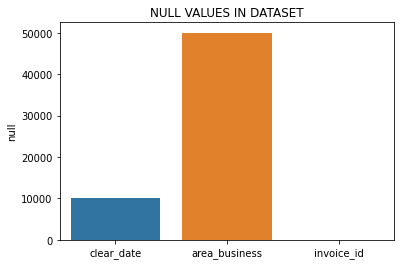

In [4]:
# null values in whole dataframe 
n = df.isnull().sum().to_frame(name = 'null') 
n = n[n['null']>0]
nf = n.index
plt.title("NULL VALUES IN DATASET")
sns.barplot(x=nf,y=n['null'])      
#showing null values in bar-plot

In [5]:
#there are NULL values in clear_date and use this to split in test_data and rest to train_data

In [6]:
#to find total null values in each column
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

In [7]:
# Dropping columns with ALL NULL values
df.dropna(how='all',inplace=True,axis=1)
# where all null values is present in area_business

In [8]:
# Dropping 3 null values in invoice id
df.dropna(subset=['invoice_id'],inplace=True,axis=0)
df.reset_index(drop=True,inplace=True)
df.shape

(49997, 18)

In [9]:
# Date-Time Conversion
df['clear_date']=pd.to_datetime(df['clear_date'],format='%Y-%m-%d %H:%M:%S')
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')
df['document_create_date']=pd.to_datetime(df['document_create_date'],format='%Y%m%d')
df['posting_date']=pd.to_datetime(df['posting_date'],format='%Y-%m-%d')
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')

In [10]:
# converted dtypes
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [11]:
# Checking for unique values in each column
df.nunique()

business_code                 6
cust_number                1413
name_customer              4140
clear_date                  403
buisness_year                 2
doc_id                    48827
posting_date                502
document_create_date        507
document_create_date.1      502
due_in_date                 548
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         44223
baseline_create_date        507
cust_payment_terms           75
invoice_id                48827
isOpen                        2
dtype: int64

In [12]:
# dropping constant values in df
unique_cols =  [x for x in df.columns if df[x].nunique()==1] 
print(unique_cols)
df.drop(unique_cols,axis=1,inplace=True)
df.columns

['document type', 'posting_id']


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms',
       'invoice_id', 'isOpen'],
      dtype='object')

In [13]:
#only null values in clear_date
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [14]:
# function to find duplicate columns in df
def findDuplicateColumns(df):
    duplicatecolumns=set()
    for x in range(df.shape[1]):
        col1=df.iloc[:,x]
        for y in range(x+1,df.shape[1]):
            col2=df.iloc[:,y]
            if col1.equals(col2):
                duplicatecolumns.add(df.columns.values[x])
    return list(duplicatecolumns)

In [15]:
# created a function to find duplicate columns
findDuplicateColumns(df)

['posting_date', 'doc_id']

In [16]:
# dropping duplicate columns
df.drop(columns=['posting_date', 'doc_id'],inplace=True)
df.shape

(49997, 14)

In [17]:
# dropping repeated column instead of document_create_date.1
df.drop(columns=['document_create_date'],inplace=True)

In [18]:
# invoice id is unique for each transaction so dropping the column
df.drop(columns=['invoice_id'],inplace=True) 
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200020431,DEC co,2019-01-10,2019.0,2019-01-05,2019-01-11,USD,5839.80,2019-01-01,NAM2,0
1,U001,0200418007,AM,2019-11-05,2019.0,2019-10-21,2019-11-05,USD,1162.98,2019-10-21,NAA8,0
2,U001,0200418007,AM llc,2019-08-09,2019.0,2019-07-16,2019-07-31,USD,1796.24,2019-07-16,NAA8,0
3,U001,0200769623,WAL-MAR llc,2019-03-07,2019.0,2019-02-25,2019-03-12,USD,13844.84,2019-02-25,NAH4,0
4,U001,CCU013,KRAFT F foundation,2019-05-31,2019.0,2019-04-18,2019-04-18,USD,2863.27,2019-04-18,NAX2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49992,U001,200974851,RESTA foundation,2019-07-05,2019.0,2019-06-19,2019-07-04,USD,2296.46,2019-06-19,NAA8,0
49993,U001,0200769623,WAL-MAR associates,2019-03-12,2019.0,2019-02-23,2019-03-10,USD,26179.69,2019-02-23,NAH4,0
49994,U001,0200763489,GENERAL in,NaT,2020.0,2020-02-27,2020-03-13,USD,961.78,2020-02-27,NAA8,1
49995,U001,0200769623,WAL-MAR foundation,2019-03-27,2019.0,2019-03-17,2019-04-01,USD,15911.34,2019-03-17,NAH4,0


In [19]:
# TARGET VARIABLE
df['delay']=(df['clear_date']-df['due_in_date']).dt.days
# adding one column to df named delay

In [20]:
# the first five rows of df
df['delay'].head()

0    -1.0
1     0.0
2     9.0
3    -5.0
4    43.0
Name: delay, dtype: float64

In [21]:
# sorting in ascending order by document_create_date.1
df.sort_values(by='document_create_date.1',inplace=True) 
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
21464,U001,0200786288,FAMILY systems,2019-01-11,2019.0,2018-12-30,2019-01-14,USD,9388.77,2018-12-30,NAA8,0,-3.0
44619,U001,0200743996,STATER associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,98774.31,2018-12-30,NAA8,0,1.0
23564,U002,0200501669,WAL MA in,2019-02-14,2019.0,2018-12-30,2019-02-03,USD,16416.00,2018-12-30,NAG2,0,11.0
6520,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,3978.34,2018-12-30,NAH4,0,-4.0
1784,U001,0200799367,MCL foundation,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,80655.16,2018-12-30,NAA8,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,U001,0200915438,GROC corporation,NaT,2020.0,2020-05-15,2020-05-30,USD,24212.00,2020-05-15,NAA8,1,NaN
6068,U001,0200915438,GROC foundation,NaT,2020.0,2020-05-18,2020-06-02,USD,1232.00,2020-05-18,NAA8,1,NaN
11495,CA02,0140105785,SHOPPE,NaT,2020.0,2020-05-19,2020-05-29,CAD,935.09,2020-05-19,CA10,1,NaN
5454,U001,0200763229,MAINES us,NaT,2020.0,2020-05-19,2020-06-03,USD,18506.94,2020-05-19,NAA8,1,NaN


### SPLITTING TEST DATA


In [22]:
# creating test set on null clear_date
test_data = df[df['clear_date'].isnull() == True].reset_index()
test_data.drop(columns=['index'],inplace=True)
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,CA02,0140104429,COSTCO foundation,NaT,2020.0,2020-02-27,2020-03-09,CAD,11006.92,2020-02-28,CA10,1,NaN
1,U001,0200762301,C&S WH llc,NaT,2020.0,2020-02-27,2020-03-13,USD,83748.66,2020-02-27,NAC6,1,NaN
2,U001,0200771157,WEIS corp,NaT,2020.0,2020-02-27,2020-03-13,USD,63083.42,2020-02-27,NAA8,1,NaN
3,U001,0200706844,WINC corporation,NaT,2020.0,2020-02-27,2020-03-13,USD,822.00,2020-02-27,NAA8,1,NaN
4,U001,0200275115,SHAWS,NaT,2020.0,2020-02-27,2020-03-13,USD,78944.40,2020-02-27,NAA8,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200915438,GROC corporation,NaT,2020.0,2020-05-15,2020-05-30,USD,24212.00,2020-05-15,NAA8,1,NaN
9996,U001,0200915438,GROC foundation,NaT,2020.0,2020-05-18,2020-06-02,USD,1232.00,2020-05-18,NAA8,1,NaN
9997,CA02,0140105785,SHOPPE,NaT,2020.0,2020-05-19,2020-05-29,CAD,935.09,2020-05-19,CA10,1,NaN
9998,U001,0200763229,MAINES us,NaT,2020.0,2020-05-19,2020-06-03,USD,18506.94,2020-05-19,NAA8,1,NaN


In [23]:
# Splitting test_set into x_test and y_test
#dropping traget column delay in x_test
x_test = test_data.drop('delay',axis=1)
x_test

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,CA02,0140104429,COSTCO foundation,NaT,2020.0,2020-02-27,2020-03-09,CAD,11006.92,2020-02-28,CA10,1
1,U001,0200762301,C&S WH llc,NaT,2020.0,2020-02-27,2020-03-13,USD,83748.66,2020-02-27,NAC6,1
2,U001,0200771157,WEIS corp,NaT,2020.0,2020-02-27,2020-03-13,USD,63083.42,2020-02-27,NAA8,1
3,U001,0200706844,WINC corporation,NaT,2020.0,2020-02-27,2020-03-13,USD,822.00,2020-02-27,NAA8,1
4,U001,0200275115,SHAWS,NaT,2020.0,2020-02-27,2020-03-13,USD,78944.40,2020-02-27,NAA8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200915438,GROC corporation,NaT,2020.0,2020-05-15,2020-05-30,USD,24212.00,2020-05-15,NAA8,1
9996,U001,0200915438,GROC foundation,NaT,2020.0,2020-05-18,2020-06-02,USD,1232.00,2020-05-18,NAA8,1
9997,CA02,0140105785,SHOPPE,NaT,2020.0,2020-05-19,2020-05-29,CAD,935.09,2020-05-19,CA10,1
9998,U001,0200763229,MAINES us,NaT,2020.0,2020-05-19,2020-06-03,USD,18506.94,2020-05-19,NAA8,1


In [24]:
# spliting y_test for delay column
y_test = test_data["delay"]
y_test

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9995   NaN
9996   NaN
9997   NaN
9998   NaN
9999   NaN
Name: delay, Length: 10000, dtype: float64

In [25]:
# x_test,y_test shape
x_test.shape , y_test.shape

((10000, 12), (10000,))

### SPLITTING DATA TRAIN

In [26]:
#main_train set on non-null clear date
main_train = df[df.clear_date.notnull()].reset_index()
main_train.drop(columns=['index'],inplace=True)
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200786288,FAMILY systems,2019-01-11,2019.0,2018-12-30,2019-01-14,USD,9388.77,2018-12-30,NAA8,0,-3.0
1,U001,0200743996,STATER associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,98774.31,2018-12-30,NAA8,0,1.0
2,U002,0200501669,WAL MA in,2019-02-14,2019.0,2018-12-30,2019-02-03,USD,16416.00,2018-12-30,NAG2,0,11.0
3,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,3978.34,2018-12-30,NAH4,0,-4.0
4,U001,0200799367,MCL foundation,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,80655.16,2018-12-30,NAA8,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39992,U001,0200759878,SA,2020-03-16,2020.0,2020-02-26,2020-03-12,USD,18900.98,2020-02-26,NAH4,0,4.0
39993,U001,0200794332,COST systems,2020-03-12,2020.0,2020-02-27,2020-03-13,USD,4063.66,2020-02-27,NAAX,0,-1.0
39994,U001,0200759878,SA corp,2020-03-13,2020.0,2020-02-27,2020-03-13,USD,49290.19,2020-02-27,NAH4,0,0.0
39995,U001,0200789077,US llc,2020-03-11,2020.0,2020-02-27,2020-03-13,USD,31094.52,2020-02-27,NAA8,0,-2.0


In [27]:
# taking 10% data for validation from main train
val2 = main_train.iloc[35850: , :].copy()
val2.reset_index(drop=True,inplace=True)

In [28]:
val2

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200706844,WINC in,2020-01-28,2020.0,2020-01-12,2020-01-27,USD,11227.85,2020-01-12,NAA8,0,1.0
1,U001,0200769623,WAL-MAR,2020-01-23,2020.0,2020-01-13,2020-01-28,USD,4665.18,2020-01-13,NAH4,0,-5.0
2,CA02,0140104429,COSTCO,2020-01-23,2020.0,2020-01-13,2020-01-27,CAD,11006.92,2020-01-17,CA10,0,-4.0
3,U001,0100031704,DELHAIZE us,2020-01-30,2020.0,2020-01-13,2020-01-28,USD,77000.53,2020-01-13,NAA8,0,2.0
4,U001,0200769623,WAL-MAR co,2020-01-23,2020.0,2020-01-13,2020-01-28,USD,43239.10,2020-01-13,NAH4,0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4142,U001,0200759878,SA,2020-03-16,2020.0,2020-02-26,2020-03-12,USD,18900.98,2020-02-26,NAH4,0,4.0
4143,U001,0200794332,COST systems,2020-03-12,2020.0,2020-02-27,2020-03-13,USD,4063.66,2020-02-27,NAAX,0,-1.0
4144,U001,0200759878,SA corp,2020-03-13,2020.0,2020-02-27,2020-03-13,USD,49290.19,2020-02-27,NAH4,0,0.0
4145,U001,0200789077,US llc,2020-03-11,2020.0,2020-02-27,2020-03-13,USD,31094.52,2020-02-27,NAA8,0,-2.0


In [29]:
# concating the main data and validation data
train_data = pd.concat([main_train, val2]).drop_duplicates(keep=False)
train_data

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200786288,FAMILY systems,2019-01-11,2019.0,2018-12-30,2019-01-14,USD,9388.77,2018-12-30,NAA8,0,-3.0
1,U001,0200743996,STATER associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,98774.31,2018-12-30,NAA8,0,1.0
2,U002,0200501669,WAL MA in,2019-02-14,2019.0,2018-12-30,2019-02-03,USD,16416.00,2018-12-30,NAG2,0,11.0
3,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,3978.34,2018-12-30,NAH4,0,-4.0
4,U001,0200799367,MCL foundation,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,80655.16,2018-12-30,NAA8,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35844,U001,0200769623,WAL-MAR systems,2020-01-22,2020.0,2020-01-12,2020-01-27,USD,30237.37,2020-01-12,NAH4,0,-5.0
35845,U001,0200794332,COST corporation,2020-01-28,2020.0,2020-01-12,2020-01-27,USD,20102.37,2020-01-12,NAAX,0,1.0
35847,CA02,0140104285,BUY- associates,2020-02-03,2020.0,2020-01-12,2020-01-31,CAD,58894.64,2020-01-21,CA10,0,3.0
35848,U001,0200764795,SYSCO corp,2020-02-04,2020.0,2020-01-12,2020-02-01,USD,11273.81,2020-01-12,NAD1,0,3.0


## EDA
Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34266 entries, 0 to 35849
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           34266 non-null  object        
 1   cust_number             34266 non-null  object        
 2   name_customer           34266 non-null  object        
 3   clear_date              34266 non-null  datetime64[ns]
 4   buisness_year           34266 non-null  float64       
 5   document_create_date.1  34266 non-null  datetime64[ns]
 6   due_in_date             34266 non-null  datetime64[ns]
 7   invoice_currency        34266 non-null  object        
 8   total_open_amount       34266 non-null  float64       
 9   baseline_create_date    34266 non-null  datetime64[ns]
 10  cust_payment_terms      34266 non-null  object        
 11  isOpen                  34266 non-null  int64         
 12  delay                   34266 non-null  float6

We can see there are no null values in our dataset. There are only 3 continuous variable column i.e. buisness_year, total_open_amount and delay,

<AxesSubplot:xlabel='business_code', ylabel='count'>

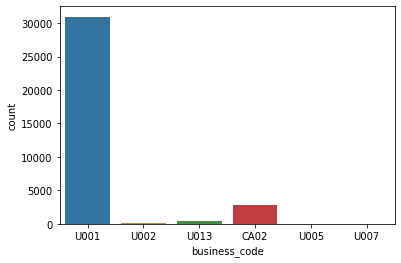

In [31]:
# business_code column
sns.countplot(x = train_data['business_code'])
# there 6 unique in business_code

In [32]:
# cust_number column
train_data['cust_number'].value_counts()
# There are 1294 unique customers in whole df

0200769623    7570
0200726979    1273
0200762301     986
0200759878     823
0200794332     789
              ... 
0200406153       1
0200481695       1
0200895983       1
0200731119       1
0100030934       1
Name: cust_number, Length: 1294, dtype: int64

In [33]:
# name_customer
train_data.name_customer.value_counts()

WAL-MAR associates     770
WAL-MAR in             768
WAL-MAR co             759
WAL-MAR foundation     754
WAL-MAR corporation    751
                      ... 
TREEHOU trust            1
AMY us                   1
JACQU in                 1
ALI systems              1
RAJ  corp                1
Name: name_customer, Length: 3620, dtype: int64

In [34]:
#clear_date column
# min data for clear_date
train_data.clear_date.min()

Timestamp('2019-01-03 00:00:00')

In [35]:
# max data for clear_date
train_data.clear_date.max() #Our clear_date ranges for 362

Timestamp('2020-05-21 00:00:00')

<AxesSubplot:xlabel='clear_date', ylabel='count'>

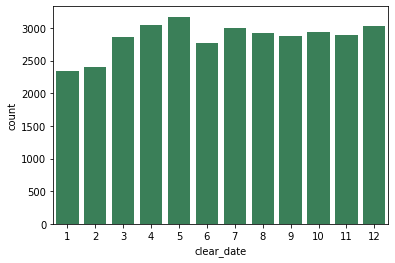

In [36]:
clear_month = train_data.clear_date.dt.month
sns.countplot(x=clear_month, color="seagreen") 
# max transaction in 'may' maonth

### buisness_year
indicates the year of clear date

In [37]:
train_data.buisness_year.value_counts()
# there is only 2 business year

2019.0    33157
2020.0     1109
Name: buisness_year, dtype: int64

### document_create_date.1


In [38]:
# The date on which the invoice document was created
train_data["document_create_date.1"].min()

Timestamp('2018-12-30 00:00:00')

In [39]:
train_data["document_create_date.1"].max()

Timestamp('2020-01-12 00:00:00')

In [40]:
# It ranges for 352 days, almost less than a year

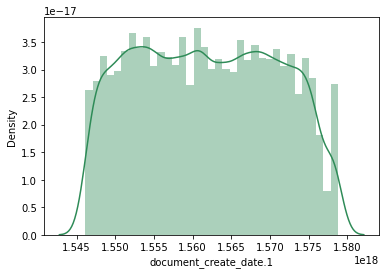

In [41]:
sns.distplot(train_data['document_create_date.1'],color='seagreen')
plt.show() 

In [42]:
# The amount that is yet to be paid for that invoice
train_data['total_open_amount'].describe()

count     34266.000000
mean      32233.012765
std       40163.695629
min           0.530000
25%        4652.450000
50%       17340.670000
75%       46670.947500
max      657721.890000
Name: total_open_amount, dtype: float64

### baseline_create_date


In [43]:
# The date on which the Invoice was created
train_data.loc[train_data["document_create_date.1"]==train_data["baseline_create_date"]]

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200786288,FAMILY systems,2019-01-11,2019.0,2018-12-30,2019-01-14,USD,9388.77,2018-12-30,NAA8,0,-3.0
1,U001,0200743996,STATER associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,98774.31,2018-12-30,NAA8,0,1.0
2,U002,0200501669,WAL MA in,2019-02-14,2019.0,2018-12-30,2019-02-03,USD,16416.00,2018-12-30,NAG2,0,11.0
3,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,3978.34,2018-12-30,NAH4,0,-4.0
4,U001,0200799367,MCL foundation,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,80655.16,2018-12-30,NAA8,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35843,U001,0200555117,BURR co,2020-01-27,2020.0,2020-01-12,2020-01-27,USD,1300.44,2020-01-12,NAA8,0,0.0
35844,U001,0200769623,WAL-MAR systems,2020-01-22,2020.0,2020-01-12,2020-01-27,USD,30237.37,2020-01-12,NAH4,0,-5.0
35845,U001,0200794332,COST corporation,2020-01-28,2020.0,2020-01-12,2020-01-27,USD,20102.37,2020-01-12,NAAX,0,1.0
35848,U001,0200764795,SYSCO corp,2020-02-04,2020.0,2020-01-12,2020-02-01,USD,11273.81,2020-01-12,NAD1,0,3.0


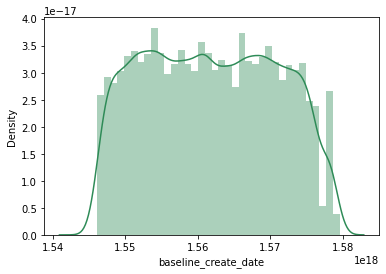

In [44]:
sns.distplot(train_data['baseline_create_date'],color='seagreen')
plt.show()

In [45]:
# Baseline create date and document create date are same except if the company is canadian there is a delay in filing the document and creating an invoice.

# It's not that important to our model so we'll drop it.

### cust_payment_terms

In [46]:
train_data.cust_payment_terms.value_counts()

NAA8    13809
NAH4     8959
CA10     2669
NAC6     1166
NAM4      954
        ...  
B030        1
NAV9        1
B052        1
NATK        1
NAUY        1
Name: cust_payment_terms, Length: 69, dtype: int64

### isOpen


In [47]:
train_data.isOpen.value_counts()
# tells us a transaction is open = 0
# tells us a transaction is closed = 1 but spliting data so closed count in down cell

0    34266
Name: isOpen, dtype: int64

### Delay

In [48]:
train_data.delay[train_data.delay<0].count()

12640

In [49]:
train_data['delay']=train_data.delay.apply(lambda x: 0 if x<0 else x)
train_data.delay[train_data.delay<0].count()

0

In [50]:
train_data.delay.describe()

count    34266.000000
mean         2.794694
std          9.388433
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        226.000000
Name: delay, dtype: float64

### invoice_currency

In [51]:
train_data['invoice_currency'].value_counts()

USD    31518
CAD     2748
Name: invoice_currency, dtype: int64

<AxesSubplot:>

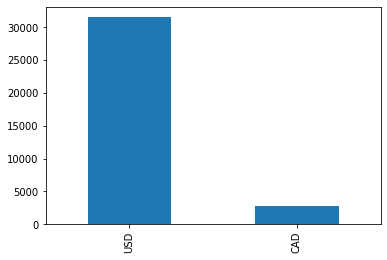

In [52]:
train_data["invoice_currency"].value_counts().plot(kind='bar')  
#bar plot for invoice currency

In [53]:
train_data.groupby("business_code").invoice_currency.value_counts()
# realtion b/w business code and invoice_currency

business_code  invoice_currency
CA02           CAD                  2748
U001           USD                 30931
U002           USD                   108
U005           USD                    11
U007           USD                     7
U013           USD                   461
Name: invoice_currency, dtype: int64

In [54]:
train_data.groupby("invoice_currency").business_code.value_counts()
# realtion b/w  invoice_currency and business code

invoice_currency  business_code
CAD               CA02              2748
USD               U001             30931
                  U013               461
                  U002               108
                  U005                11
                  U007                 7
Name: business_code, dtype: int64

In [55]:
# in above currency cell their paying in own currency type

In [56]:
train_data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'document_create_date.1', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'isOpen', 'delay'],
      dtype='object')

In [57]:
train_data.corr()

,buisness_year,total_open_amount,isOpen,delay
buisness_year,1.000000,0.001242,NaN,0.012729
total_open_amount,0.001242,1.000000,NaN,-0.054044
isOpen,NaN,NaN,NaN,NaN
delay,0.012729,-0.054044,NaN,1.000000


# FEATURE ENGINEERING

In [58]:
# removing unnecssary columns in train data
train_data.drop(columns=['business_code', 'name_customer','buisness_year','invoice_currency','baseline_create_date', 'cust_payment_terms', 'isOpen'], inplace=True)
train_data

,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,delay
0,0200786288,2019-01-11,2018-12-30,2019-01-14,9388.77,0.0
1,0200743996,2019-01-15,2018-12-30,2019-01-14,98774.31,1.0
2,0200501669,2019-02-14,2018-12-30,2019-02-03,16416.00,11.0
3,0200769623,2019-01-10,2018-12-30,2019-01-14,3978.34,0.0
4,0200799367,2019-01-15,2018-12-30,2019-01-14,80655.16,1.0
...,...,...,...,...,...,...
35844,0200769623,2020-01-22,2020-01-12,2020-01-27,30237.37,0.0
35845,0200794332,2020-01-28,2020-01-12,2020-01-27,20102.37,1.0
35847,0140104285,2020-02-03,2020-01-12,2020-01-31,58894.64,3.0
35848,0200764795,2020-02-04,2020-01-12,2020-02-01,11273.81,3.0


In [59]:
# Extracting day and month from document_create_date.1 and due_in_date.
train_data["doc_create_day"] = train_data["document_create_date.1"].dt.day
train_data["doc_create_month"] = train_data["document_create_date.1"].dt.month

train_data["due_day"] = train_data["due_in_date"].dt.day
train_data["due_month"] = train_data["due_in_date"].dt.month

In [60]:
train_data

,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month
0,0200786288,2019-01-11,2018-12-30,2019-01-14,9388.77,0.0,30,12,14,1
1,0200743996,2019-01-15,2018-12-30,2019-01-14,98774.31,1.0,30,12,14,1
2,0200501669,2019-02-14,2018-12-30,2019-02-03,16416.00,11.0,30,12,3,2
3,0200769623,2019-01-10,2018-12-30,2019-01-14,3978.34,0.0,30,12,14,1
4,0200799367,2019-01-15,2018-12-30,2019-01-14,80655.16,1.0,30,12,14,1
...,...,...,...,...,...,...,...,...,...,...
35844,0200769623,2020-01-22,2020-01-12,2020-01-27,30237.37,0.0,12,1,27,1
35845,0200794332,2020-01-28,2020-01-12,2020-01-27,20102.37,1.0,12,1,27,1
35847,0140104285,2020-02-03,2020-01-12,2020-01-31,58894.64,3.0,12,1,31,1
35848,0200764795,2020-02-04,2020-01-12,2020-02-01,11273.81,3.0,12,1,1,2


In [61]:
#dropping previous clear_date and document_create_date.1 columns 
train_data.drop(columns=['clear_date', 'document_create_date.1', 'due_in_date'], inplace=True)
train_data

,cust_number,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month
0,0200786288,9388.77,0.0,30,12,14,1
1,0200743996,98774.31,1.0,30,12,14,1
2,0200501669,16416.00,11.0,30,12,3,2
3,0200769623,3978.34,0.0,30,12,14,1
4,0200799367,80655.16,1.0,30,12,14,1
...,...,...,...,...,...,...,...
35844,0200769623,30237.37,0.0,12,1,27,1
35845,0200794332,20102.37,1.0,12,1,27,1
35847,0140104285,58894.64,3.0,12,1,31,1
35848,0200764795,11273.81,3.0,12,1,1,2


In [62]:
# cust_number column there some string data present in this column
# .str.extract('(\d+)') by using this we str to float
# I am trying to use the str.extract('(\d+)') method to convert str to integer format
train_data['cn'] = train_data['cust_number'].str.extract('(\d+)')

# then will drop that column for encoding
train_data.drop('cust_number',axis=1,inplace=True)
train_data

,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,9388.77,0.0,30,12,14,1,0200786288
1,98774.31,1.0,30,12,14,1,0200743996
2,16416.00,11.0,30,12,3,2,0200501669
3,3978.34,0.0,30,12,14,1,0200769623
4,80655.16,1.0,30,12,14,1,0200799367
...,...,...,...,...,...,...,...
35844,30237.37,0.0,12,1,27,1,0200769623
35845,20102.37,1.0,12,1,27,1,0200794332
35847,58894.64,3.0,12,1,31,1,0140104285
35848,11273.81,3.0,12,1,1,2,0200764795


In [63]:
# this method to show the all datatypes in dataframe
train_data.dtypes

total_open_amount    float64
delay                float64
doc_create_day         int64
doc_create_month       int64
due_day                int64
due_month              int64
cn                    object
dtype: object

In [64]:
# converted the data-type of cn as float
train_data['cn']=train_data['cn'].astype(str).astype(float)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34266 entries, 0 to 35849
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  34266 non-null  float64
 1   delay              34266 non-null  float64
 2   doc_create_day     34266 non-null  int64  
 3   doc_create_month   34266 non-null  int64  
 4   due_day            34266 non-null  int64  
 5   due_month          34266 non-null  int64  
 6   cn                 34266 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 3.1 MB


In [65]:
# Splitting train_data into x_train and y_train
# in x_train dropping target column = delay
x_train = train_data.drop(["delay"], axis=1).copy()
x_train

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,9388.77,30,12,14,1,200786288.0
1,98774.31,30,12,14,1,200743996.0
2,16416.00,30,12,3,2,200501669.0
3,3978.34,30,12,14,1,200769623.0
4,80655.16,30,12,14,1,200799367.0
...,...,...,...,...,...,...
35844,30237.37,12,1,27,1,200769623.0
35845,20102.37,12,1,27,1,200794332.0
35847,58894.64,12,1,31,1,140104285.0
35848,11273.81,12,1,1,2,200764795.0


In [66]:
# Splitting train_data into y_train
y_train = train_data['delay']
y_train

0         0.0
1         1.0
2        11.0
3         0.0
4         1.0
         ... 
35844     0.0
35845     1.0
35847     3.0
35848     3.0
35849     1.0
Name: delay, Length: 34266, dtype: float64

In [67]:
#Now repeating the same pre-processing on validation data
val2['delay']=val2.delay.apply(lambda x: 0 if x<0 else x)
val2.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

val2["doc_create_day"] = val2["document_create_date.1"].dt.day
val2["doc_create_month"] = val2["document_create_date.1"].dt.month

val2["due_day"] = val2["due_in_date"].dt.day
val2["due_month"] = val2["due_in_date"].dt.month

val2['cn'] = val2['cust_number'].str.extract('(\d+)')
val2.drop('cust_number',axis=1,inplace=True)

val2.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
val2

,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,11227.85,1.0,12,1,27,1,0200706844
1,4665.18,0.0,13,1,28,1,0200769623
2,11006.92,0.0,13,1,27,1,0140104429
3,77000.53,2.0,13,1,28,1,0100031704
4,43239.10,0.0,13,1,28,1,0200769623
...,...,...,...,...,...,...,...
4142,18900.98,4.0,26,2,12,3,0200759878
4143,4063.66,0.0,27,2,13,3,0200794332
4144,49290.19,0.0,27,2,13,3,0200759878
4145,31094.52,0.0,27,2,13,3,0200789077


In [68]:
# encoding str to float for cust_number column
val2['cn']=val2['cn'].astype(str).astype(float)
val2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147 entries, 0 to 4146
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  4147 non-null   float64
 1   delay              4147 non-null   float64
 2   doc_create_day     4147 non-null   int64  
 3   doc_create_month   4147 non-null   int64  
 4   due_day            4147 non-null   int64  
 5   due_month          4147 non-null   int64  
 6   cn                 4147 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 226.9 KB


In [69]:
# spliting validation data into two x_val and y_val
# in x_val dropping delay column
x_val2 = val2.drop(["delay"], axis=1).copy()
x_val2

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,11227.85,12,1,27,1,200706844.0
1,4665.18,13,1,28,1,200769623.0
2,11006.92,13,1,27,1,140104429.0
3,77000.53,13,1,28,1,100031704.0
4,43239.10,13,1,28,1,200769623.0
...,...,...,...,...,...,...
4142,18900.98,26,2,12,3,200759878.0
4143,4063.66,27,2,13,3,200794332.0
4144,49290.19,27,2,13,3,200759878.0
4145,31094.52,27,2,13,3,200789077.0


In [70]:
# taking y_val delay column only
y_val2 = val2['delay']
y_val2

0       1.0
1       0.0
2       0.0
3       2.0
4       0.0
       ... 
4142    4.0
4143    0.0
4144    0.0
4145    0.0
4146    6.0
Name: delay, Length: 4147, dtype: float64

In [71]:
#repeating the same pre-processing on x_test
x_test.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

x_test["doc_create_day"] = x_test["document_create_date.1"].dt.day
x_test["doc_create_month"] = x_test["document_create_date.1"].dt.month

x_test["due_day"] = x_test["due_in_date"].dt.day
x_test["due_month"] = x_test["due_in_date"].dt.month

x_test['cn'] = x_test['cust_number'].str.extract('(\d+)')
x_test.drop('cust_number',axis=1,inplace=True)

x_test.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
x_test

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,11006.92,27,2,9,3,0140104429
1,83748.66,27,2,13,3,0200762301
2,63083.42,27,2,13,3,0200771157
3,822.00,27,2,13,3,0200706844
4,78944.40,27,2,13,3,0200275115
...,...,...,...,...,...,...
9995,24212.00,15,5,30,5,0200915438
9996,1232.00,18,5,2,6,0200915438
9997,935.09,19,5,29,5,0140105785
9998,18506.94,19,5,3,6,0200763229


In [72]:
# encoding cust_number column as cn
x_test['cn']=x_test['cn'].astype(str).astype(float)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  10000 non-null  float64
 1   doc_create_day     10000 non-null  int64  
 2   doc_create_month   10000 non-null  int64  
 3   due_day            10000 non-null  int64  
 4   due_month          10000 non-null  int64  
 5   cn                 10000 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 468.9 KB


## FEATURE SELECTION
Feature selection is the process of reducing the number of input variables when developing a predictive model.

<AxesSubplot:>

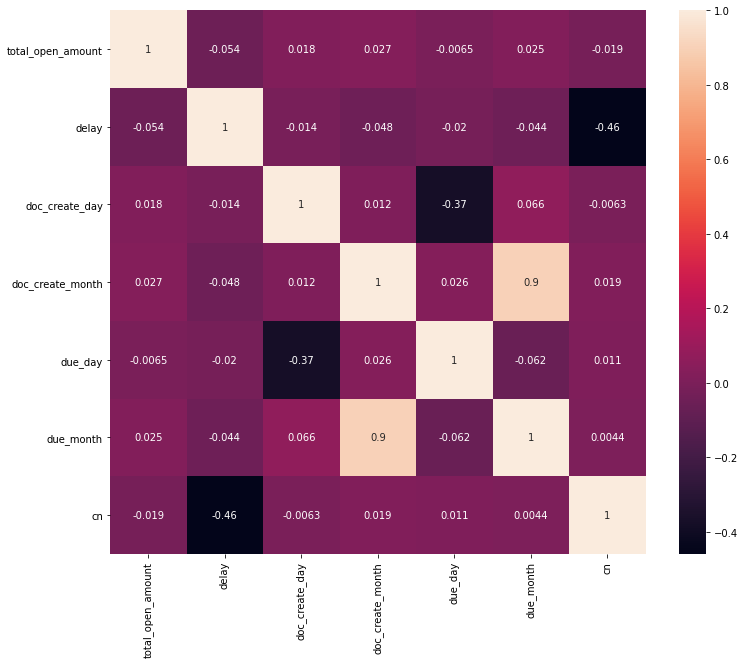

In [73]:
# a heatmap is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions.
plt.figure(figsize=(12,10))
sns.heatmap(train_data.corr(),annot=True)

In [74]:
#above graph due_month and doc_create_month are highly correlated. so removing due_month
x_train = x_train.drop(["due_month"], axis=1).copy()
x_val2 = x_val2.drop(["due_month"], axis=1).copy()
x_test = x_test.drop(["due_month"], axis=1).copy()

## MODELING

In [75]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
Algorithm = []
Accuracy = []

### **1. Linear Regression**

In [76]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
c1 = LinearRegression()
c1.fit(x_train, y_train)

# Predicting the Test Set Results
predicted1 = c1.predict(x_val2)


In [77]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(round(sm.mean_squared_error(y_val2, predicted1), 2))
Accuracy.append(c1.score(x_val2,y_val2))

### **2. Support Vector Regression**

In [78]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
c2 = SVR()
c2.fit(x_train, y_train)

# Predicting the Test Set Results
predicted2 = c2.predict(x_val2)

In [79]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(round(sm.mean_squared_error(y_val2, predicted2), 2))
Accuracy.append(c2.score(x_val2,y_val2))

### **3. Decision Tree Regressor**

In [80]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
c3 = DecisionTreeRegressor()
c3.fit(x_train, y_train)

# Predicting the Test Set Results
predicted3 = c3.predict(x_val2)

In [81]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(round(sm.mean_squared_error(y_val2, predicted3), 2))
Accuracy.append(c3.score(x_val2,y_val2))

### **4. Random Forest Regressor**

In [82]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
c4 = RandomForestRegressor()
c4.fit(x_train, y_train)

# Predicting the Test Set Results
predicted4 = c4.predict(x_val2)

In [83]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(round(sm.mean_squared_error(y_val2, predicted4), 2))
Accuracy.append(c4.score(x_val2,y_val2))

### **5. XGB Regressor**

In [84]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
c5 = xgb.XGBRegressor()
c5.fit(x_train, y_train)

# Predicting the Test Set Results
predicted5 = c5.predict(x_val2)

In [85]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(round(sm.mean_squared_error(y_val2, predicted5), 2))
Accuracy.append(c5.score(x_val2,y_val2))

### Score Card for all Model

In [86]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Score = pd.DataFrame(list(zip(Algorithm, MSE_Score,Accuracy)), columns = ['Algorithm', 'MSE_Score','Accuracy'])

In [87]:
# Score Card
Score

,Algorithm,MSE_Score,Accuracy
0,Linear Regression,47.19,0.232635
1,Support Vector Regression,47.62,0.225732
2,Decision Tree Regressor,158.64,-1.579435
3,Random Forest Regressor,35.55,0.421934
4,XGB Regressor,32.58,0.470199


### Predicting The X_TEST

In [88]:
# preducting x_test from low mean value squared error
pre = c5.predict(x_test)

In [89]:
pre = np.around(pre)
pre.astype(int)

array([ 4,  1,  0, ...,  5,  1, 17])

In [90]:
len(pre) #We got the delay on test set.

10000

In [91]:
#Creating a new dataframe named output
output = pd.DataFrame()

In [92]:
#Appending the delay predicted column in it
d =[]
for x in pre:
    d.append(pd.Timedelta(days=x))
output['DELAY'] = d
# timedelta is used to diff b/w two dates

In [93]:
output

,DELAY
0,4 days
1,1 days
2,0 days
3,1 days
4,1 days
...,...
9995,1 days
9996,3 days
9997,5 days
9998,1 days


In [94]:
# Predicting the clear date
output['CLEAR_DATE'] = test_data['due_in_date'] + output['DELAY']

In [95]:
output

,DELAY,CLEAR_DATE
0,4 days,2020-03-13
1,1 days,2020-03-14
2,0 days,2020-03-13
3,1 days,2020-03-14
4,1 days,2020-03-14
...,...,...
9995,1 days,2020-05-31
9996,3 days,2020-06-05
9997,5 days,2020-06-03
9998,1 days,2020-06-04


In [96]:
# Creating the Aging Bucket
b = []
for x in pre:
    if x<=15:
        b.append("0-15 days")
    elif x<=30:
        b.append("16-30 days")
    elif x<=45:
        b.append("31-45 days")
    elif x<=60:
        b.append("46-60 days")
    else:
        b.append("> 60 days")

In [97]:
#loading ageing buckets range into output datafram
output['AGEING BUCKETS'] = b
output

,DELAY,CLEAR_DATE,AGEING BUCKETS
0,4 days,2020-03-13,0-15 days
1,1 days,2020-03-14,0-15 days
2,0 days,2020-03-13,0-15 days
3,1 days,2020-03-14,0-15 days
4,1 days,2020-03-14,0-15 days
...,...,...,...
9995,1 days,2020-05-31,0-15 days
9996,3 days,2020-06-05,0-15 days
9997,5 days,2020-06-03,0-15 days
9998,1 days,2020-06-04,0-15 days


## End Game

In [98]:
#Creating a new dataframe for Final output
Final=pd.DataFrame()

In [99]:
# dropping null columns in test_data
test_data.drop(columns = ['clear_date','delay'],inplace =True,axis=1)

In [100]:
#concating test_data and final_output
Final = pd.concat([test_data,output],axis=1)

In [101]:
Final

,business_code,cust_number,name_customer,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,DELAY,CLEAR_DATE,AGEING BUCKETS
0,CA02,0140104429,COSTCO foundation,2020.0,2020-02-27,2020-03-09,CAD,11006.92,2020-02-28,CA10,1,4 days,2020-03-13,0-15 days
1,U001,0200762301,C&S WH llc,2020.0,2020-02-27,2020-03-13,USD,83748.66,2020-02-27,NAC6,1,1 days,2020-03-14,0-15 days
2,U001,0200771157,WEIS corp,2020.0,2020-02-27,2020-03-13,USD,63083.42,2020-02-27,NAA8,1,0 days,2020-03-13,0-15 days
3,U001,0200706844,WINC corporation,2020.0,2020-02-27,2020-03-13,USD,822.00,2020-02-27,NAA8,1,1 days,2020-03-14,0-15 days
4,U001,0200275115,SHAWS,2020.0,2020-02-27,2020-03-13,USD,78944.40,2020-02-27,NAA8,1,1 days,2020-03-14,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200915438,GROC corporation,2020.0,2020-05-15,2020-05-30,USD,24212.00,2020-05-15,NAA8,1,1 days,2020-05-31,0-15 days
9996,U001,0200915438,GROC foundation,2020.0,2020-05-18,2020-06-02,USD,1232.00,2020-05-18,NAA8,1,3 days,2020-06-05,0-15 days
9997,CA02,0140105785,SHOPPE,2020.0,2020-05-19,2020-05-29,CAD,935.09,2020-05-19,CA10,1,5 days,2020-06-03,0-15 days
9998,U001,0200763229,MAINES us,2020.0,2020-05-19,2020-06-03,USD,18506.94,2020-05-19,NAA8,1,1 days,2020-06-04,0-15 days


### the end